Identify whether male or female based on the weight and height data

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
data=pd.read_csv("Test set.csv")

In [3]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [4]:
#encode the sex columnt to numerical values
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [5]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [6]:
#generate X and y dataset
X=data.drop('Sex',axis=1)
y=data['Sex']

In [7]:
#normalize data set
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=['Height','Weight'])
X.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [8]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object

In [9]:
#change the object type of y
y=y.astype('int')

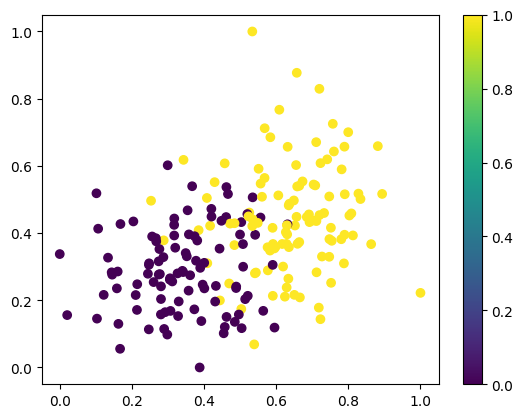

In [10]:
plt.scatter(X['Height'],X['Weight'],c=y)
plt.colorbar()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 2), (41, 2), (164,), (41,))

Model building

In [12]:
#create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(2,)),#bcoz we give 2 input variables
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')#incase this is a multiclass problem, we can use no of class as count, activationfunction would be softmax.
                                                #then y will have probablity values of each class. we can select max prbability as the output.
])
#complie model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#for multiple class categoricalcrosentropy function can be used to find the loss. 

#train model
epoch_number=20
history=model.fit(X_train,y_train,epochs=epoch_number)

Epoch 1/20


c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4756 - loss: 0.7210  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4695 - loss: 0.7097 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3293 - loss: 0.7008 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4939 - loss: 0.6922 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5305 - loss: 0.6870 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5366 - loss: 0.6812 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5366 - loss: 0.6765 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.6715 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.6667 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.6614 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 0.6563 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 0.6518 
Epoch 13/20

In [13]:
#check model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,333 (9.12 KB)

 Trainable params: 777 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,556 (6.08 KB)

In [14]:
#evaluate the model
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5366 - loss: 0.6342


[0.6341671943664551, 0.5365853905677795]

In [15]:
y_predictions=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [16]:
y_predictions[:5]

array([[0.53242314],
       [0.6529944 ],
       [0.6607218 ],
       [0.5806987 ],
       [0.61763215]], dtype=float32)

In [17]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [18]:
#precision
precision=tf.keras.metrics.Precision()
precision.update_state(y_test,tf.round(y_predictions))
precision.result().numpy()

np.float32(0.51282054)

In [19]:
#recall
recall=tf.keras.metrics.Recall()
recall.update_state(y_test,tf.round(y_predictions))
recall.result().numpy()

np.float32(1.0)

In [20]:
history.history

{'accuracy': [0.47560974955558777,
  0.4695121943950653,
  0.32926830649375916,
  0.49390244483947754,
  0.5304877758026123,
  0.5365853905677795,
  0.5365853905677795,
  0.542682945728302,
  0.542682945728302,
  0.542682945728302,
  0.5487805008888245,
  0.5487805008888245,
  0.542682945728302,
  0.542682945728302,
  0.542682945728302,
  0.5487805008888245,
  0.5487805008888245,
  0.5914633870124817,
  0.5914633870124817,
  0.6158536672592163],
 'loss': [0.7210192680358887,
  0.7097260355949402,
  0.7007632851600647,
  0.6921980381011963,
  0.6869566440582275,
  0.6812302470207214,
  0.6765021085739136,
  0.6715375185012817,
  0.6667169332504272,
  0.6614264845848083,
  0.656339704990387,
  0.6518028974533081,
  0.6475442051887512,
  0.6425413489341736,
  0.638707160949707,
  0.6351876258850098,
  0.6305105686187744,
  0.6258246302604675,
  0.6214269399642944,
  0.6164438724517822]}

<Axes: >

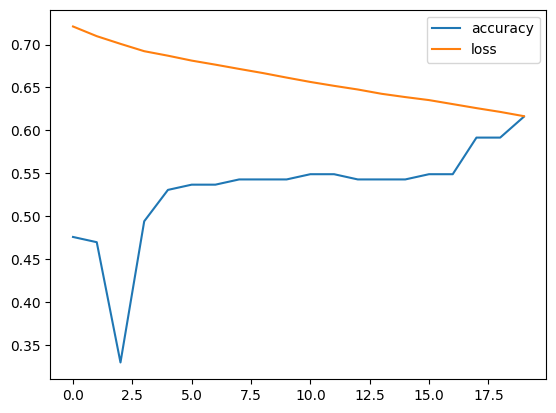

In [21]:
pd.DataFrame(history.history).plot()

In [ ]:
#Saving the model as a keras model. create a .keras folder in the same file location
model.save('new_model_1.keras')

In [23]:
#save the model using HDF5 format
model.save('new_model_2.h5')

In [24]:
#Loading the saved model to a variable
import tensorflow as tf
new_model=tf.keras.models.load_model('new_model_1.keras')

In [25]:
new_model.summary()#simialr to built model summary.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,333 (9.12 KB)

 Trainable params: 777 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,556 (6.08 KB)

In [29]:
y_newModel_predictions=new_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [30]:
y_newModel_predictions[:5]

array([[0.53242314],
       [0.6529944 ],
       [0.6607218 ],
       [0.5806987 ],
       [0.61763215]], dtype=float32)